In [1]:
!pip install tqdm
!pip install time

ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


In [2]:
from tqdm.notebook import tqdm_notebook
import time

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('Email_spam_dataset/lingSpam.csv')
data.head()

Unnamed: 0                                               Body  Label
0           0  Subject: great part-time or summer job !\n \n ...      1
1           1  Subject: auto insurance rates too high ?\n \n ...      1
2           2  Subject: do want the best and economical hunti...      1
3           3  Subject: email 57 million people for $ 99\n \n...      1
4           4  Subject: do n't miss these !\n \n attention ! ...      1

In [5]:
data.columns

Index(['Unnamed: 0', 'Body', 'Label'], dtype='object')

In [6]:
data

Unnamed: 0                                               Body  Label
0              0  Subject: great part-time or summer job !\n \n ...      1
1              1  Subject: auto insurance rates too high ?\n \n ...      1
2              2  Subject: do want the best and economical hunti...      1
3              3  Subject: email 57 million people for $ 99\n \n...      1
4              4  Subject: do n't miss these !\n \n attention ! ...      1
...          ...                                                ...    ...
2600        2600  Subject: computationally - intensive methods i...      0
2601        2601  Subject: books : a survey of american linguist...      0
2602        2602  Subject: wecol ' 98 - - western conference on ...      0
2603        2603  Subject: euralex ' 98 - revised programme\n \n...      0
2604        2604  ,Body,Label\n 0,"Subject: great part-time or s...      0

[2605 rows x 3 columns]

In [7]:
data.Label.unique()

array([1, 0], dtype=int64)

In [8]:
data.set_index(["Label"]).count()

Unnamed: 0    2605
Body          2605
dtype: int64

In [9]:
print(data['Body'])

0       Subject: great part-time or summer job !\n \n ...
1       Subject: auto insurance rates too high ?\n \n ...
2       Subject: do want the best and economical hunti...
3       Subject: email 57 million people for $ 99\n \n...
4       Subject: do n't miss these !\n \n attention ! ...
                              ...                        
2600    Subject: computationally - intensive methods i...
2601    Subject: books : a survey of american linguist...
2602    Subject: wecol ' 98 - - western conference on ...
2603    Subject: euralex ' 98 - revised programme\n \n...
2604    ,Body,Label\n 0,"Subject: great part-time or s...
Name: Body, Length: 2605, dtype: object


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2605 entries, 0 to 2604
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2605 non-null   int64 
 1   Body        2605 non-null   object
 2   Label       2605 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.2+ KB


In [11]:
data.isnull().sum()

Unnamed: 0    0
Body          0
Label         0
dtype: int64

In [12]:
y = data.Label
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [13]:
y.unique()

array([1, 0], dtype=int64)

In [14]:
data['Body'][3]

'Subject: email 57 million people for $ 99\n \n 57 million email addresses for only $ 99 you want to make some money ? i can put you in touch with over 50 million people at virtually no cost . can you make one cent from each of theses names ? if you can you have a profit of over $ 500 , 000 . 00 that \'s right , i have 57 million fresh email addresses that i will sell for only $ 99 . these are all fresh addresses that include almost every person on the internet today , with no duplications . they are all sorted and ready to be mailed . that is the best deal anywhere today ! imagine selling a product for only $ 5 and getting only a 1 / 10 % response . that \'s $ 2 , 850 , 000 in your pocket ! ! ! do n\'t believe it ? people are making that kind of money right now by doing the same thing , that is why you get so much email from people selling you their product . . . . it works ! i will even tell you how to mail them with easy to follow step-by - step instructions i include with every ord

In [15]:
txt = []
for i in range(len(data['Body'])):
    txt.append(data['Body'][i])

In [16]:
len(txt)

2605

In [17]:
type(txt[0])

str

In [18]:
import re

In [19]:
txt

['Subject: great part-time or summer job !\n \n * * * * * * * * * * * * * * * we have display boxes with credit applications that we need to place in the small owner-operated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1-

In [20]:
text = []
for i in tqdm_notebook(range(len(txt))):
    tex = txt[i]
    pattern = '([\w]+.@.[\w]+...[[\w]+)|@.[\w_]*|<[\w]+>|[*]+|(\\[n])|[\w]+:|\n|\t|_|=|-|!|>|<|#|(http\D{7}[\w]+\D{3}[\w]+\D{3}[\w]+\D{3})|(http\D{7}www\D{3}[\w]+\D{3}[\w]+\D{3}[\w]+\D{3}[\w]+)'
    
    cleantext = re.sub(pattern, '', tex)
    cleantext = cleantext.lower()
    text.append(cleantext)

<ipython-input-20-f6a67dec65b8>:6: FutureWarning: Possible nested set at position 18
  cleantext = re.sub(pattern, '', tex)


In [21]:
len(text)

2605

In [22]:
text

[' great parttime or summer job                  we have display boxes with credit applications that we need to place in the small owneroperated stores in your area . here is what you do : 1 . introduce yourself to the store owner or manager . 2 . use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 . 00 to $ 15 . 00 or more for every app sent in . 3 . find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks . your compensaation will be $ 10 for every box you place . by becoming a representative you could also earn a commission of $ 10 for each application that came from that store . that is of course a much more profitable plan , as it will pay you for months or years for a very small effort . call 1888  7035390 code 3 24 hours to

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
sentences = []
for i in tqdm_notebook(range(len(text))):
    t= text[i]
    sentences.append(nltk.sent_tokenize(t))

In [25]:
len(sentences)

2605

In [26]:
from nltk import word_tokenize

In [27]:
type(sentences[0])

list

In [28]:
a =  str(sentences[0])
print(a, type(a))

[' great parttime or summer job                  we have display boxes with credit applications that we need to place in the small owneroperated stores in your area .', 'here is what you do : 1 .', 'introduce yourself to the store owner or manager .', '2 .', 'use our 90 % effective script which tells them how this little display box will save their customers hundreds of dollars , be a drawing card for their business , and make them from $ 5 .', '00 to $ 15 .', '00 or more for every app sent in .', '3 .', 'find a good spot on the counter , place the box there , and say that nothing more need be done , all you need is his name and address so the company can send him the commission checks .', 'your compensaation will be $ 10 for every box you place .', 'by becoming a representative you could also earn a commission of $ 10 for each application that came from that store .', 'that is of course a much more profitable plan , as it will pay you for months or years for a very small effort .', 'c

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
lim = WordNetLemmatizer()

In [33]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [34]:
processed = []
for i in tqdm_notebook(range(len(data.Body))):
    tokens = word_tokenize(text[i])
    words = []
    for word in tokens:
        if word not in stop_words:
            words.append(word)
    lemmas = []
    for lemma in words:
        norm = lim.lemmatize(lemma)
        lemmas.append(norm)
    
    lemmas = ' '.join(lemmas)
    processed.append(lemmas)

In [35]:
len(processed)

2605

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# BOW

In [37]:
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(processed)
feature_names = vectorizer.get_feature_names()
feature_names

['00',
 '000',
 '0000',
 '00001',
 '0000300014046',
 '0000300395880',
 '0000536088',
 '0000725',
 '0001',
 '000100',
 '00014',
 '000265',
 '0003',
 '00065',
 '00080',
 '00085',
 '0009',
 '000bp',
 '000s',
 '000yen',
 '001',
 '0010',
 '0011',
 '0012',
 '0013',
 '00133',
 '0014',
 '0015',
 '0016',
 '0017',
 '0018',
 '0019',
 '00198',
 '002',
 '0020',
 '0021',
 '002656',
 '0027',
 '003',
 '0030',
 '0033387902188',
 '00393193',
 '004161',
 '0044',
 '0049',
 '004940',
 '0049521',
 '005',
 '006',
 '007',
 '00710',
 '00799',
 '008',
 '009',
 '00919680',
 '00a',
 '00am',
 '00arrival',
 '00b',
 '00coffee',
 '00congress',
 '00d',
 '00dinner',
 '00h',
 '00j',
 '00l',
 '00m',
 '00p',
 '00pm',
 '00r',
 '00t',
 '00tea',
 '00the',
 '00uzheb',
 '01',
 '010',
 '0100',
 '01003',
 '0101',
 '01040306',
 '01075',
 '0108',
 '011',
 '0111',
 '01149',
 '01152',
 '011678',
 '0117',
 '0118',
 '01182',
 '01222',
 '01225',
 '01232366243',
 '01235',
 '01237',
 '01273',
 '013',
 '0131',
 '013114332',
 '01334',
 '01

In [38]:
len(feature_names)

57031

In [39]:
print(bag_of_words.shape, y.shape)

(2605, 57031) (2605,)


In [40]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(bag_of_words, y, shuffle = True, random_state = 152, test_size = 0.2) 

# Logistics Regression with BOW

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

prediction = model.predict(xtest)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 0 0 0 1 0 

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
accuracy = accuracy_score(ytest, prediction)
print(f'The accuracy of our logistic regression is {accuracy}')

The accuracy of our logistic regression is 0.9865642994241842


In [45]:
cm = confusion_matrix(ytest, prediction)
print(cm)

[[438   1]
 [  6  76]]


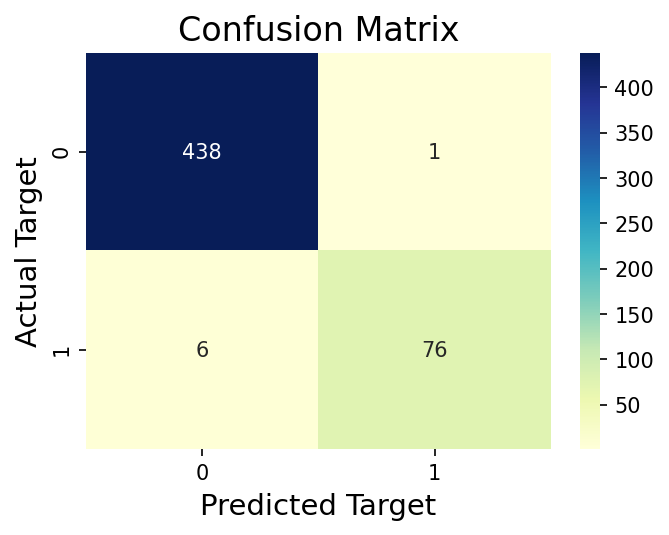

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

# Naive Bayes with BOW

In [47]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(xtrain, ytrain)

bayes_pred = bayes.predict(xtest)
bayes_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
bayes_acc = accuracy_score(ytest, bayes_pred)
print(f'The accuracy of naive bayes is {bayes_acc}')

The accuracy of naive bayes is 0.9942418426103646


In [49]:
cm_bayes = confusion_matrix(ytest, bayes_pred)
print(cm_bayes)

[[436   3]
 [  0  82]]


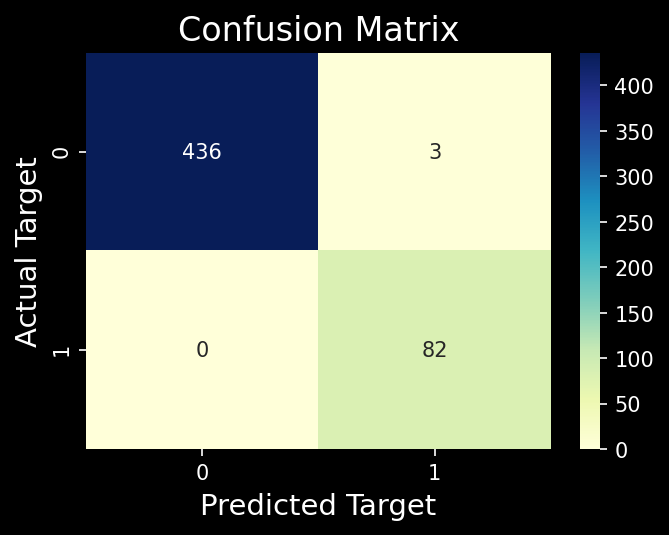

In [50]:

fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(cm_bayes, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

In [51]:
cr_bayes = classification_report(ytest, bayes_pred)
print(cr_bayes)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       439
           1       0.96      1.00      0.98        82

    accuracy                           0.99       521
   macro avg       0.98      1.00      0.99       521
weighted avg       0.99      0.99      0.99       521



# TF IDF Vectorization

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english',lowercase = True, ngram_range=(2,5))
idf = vectorizer.fit_transform(processed)
feature_names = vectorizer.get_feature_names()

In [53]:
len(feature_names)

2071609

In [54]:
print(idf.shape, y.shape)

(2605, 2071609) (2605,)


In [55]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(idf, y, shuffle = True, random_state = 152) 

# Logistics Regression with TF IDF 

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [58]:
prediction = model.predict(xtest)
print(prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [59]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(ytest, prediction)
print(f'The accuracy of our logistic regression is {accuracy}')

The accuracy of our logistic regression is 0.8634969325153374


In [60]:
cm = confusion_matrix(ytest, prediction)
print(cm)


[[553   0]
 [ 89  10]]


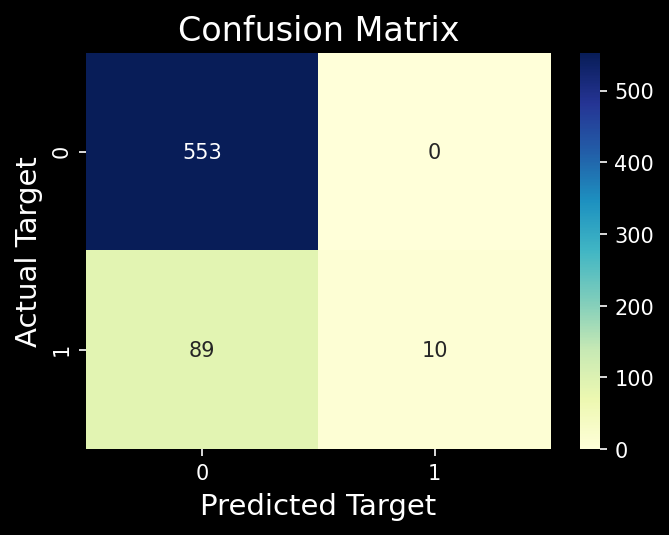

In [61]:

fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

# Naive Bayes with TF IDF Vectorization

In [62]:
from sklearn.naive_bayes import MultinomialNB

bayes = MultinomialNB()
bayes.fit(xtrain, ytrain)


MultinomialNB()

In [63]:
bayes_pred = bayes.predict(xtest)
bayes_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [64]:
bayes_acc = accuracy_score(ytest, bayes_pred)
print(f'The accuracy of naive bayes is {bayes_acc}')

The accuracy of naive bayes is 0.8819018404907976


In [65]:
cm_bayes = confusion_matrix(ytest, bayes_pred)
print(cm_bayes)

[[553   0]
 [ 77  22]]


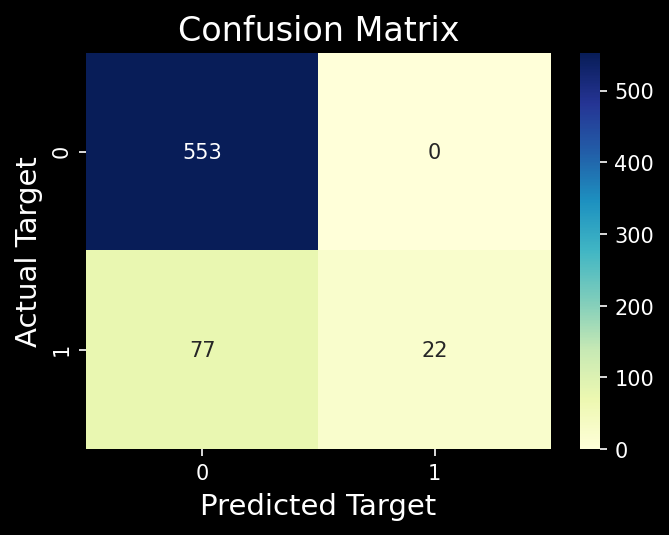

In [66]:

fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(cm_bayes, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')

In [67]:
cr_bayes = classification_report(ytest, bayes_pred)
print(cr_bayes)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       553
           1       1.00      0.22      0.36        99

    accuracy                           0.88       652
   macro avg       0.94      0.61      0.65       652
weighted avg       0.90      0.88      0.85       652

